<a href="https://colab.research.google.com/github/swastikbanerjee/AML_Lab/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Matrix:


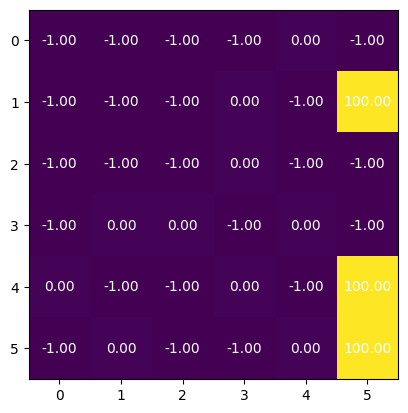



Final Convergence Value Matrix:


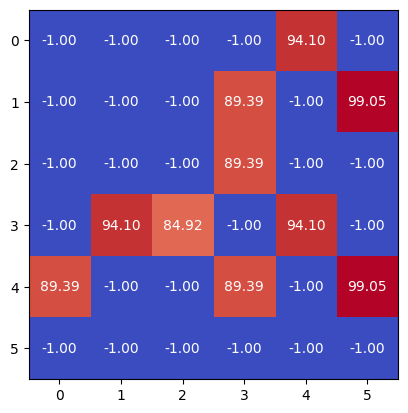



Best Path: [0, 4, 5]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

NUM_ROOMS = 6
GOAL_STATE = 5
NUM_EPISODES = 1000
LEARNING_RATE = 0.8
DISCOUNT_FACTOR = 0.95

paths = {
    0: [4],
    1: [3, 5],
    2: [3],
    3: [1, 2, 4],
    4: [0, 3, 5],
    5: [1, 4, 5]
}

def initialize_q_matrix():
    return np.full((NUM_ROOMS, NUM_ROOMS), -1, dtype=float)

def update_q_matrix(q_matrix, state, action, reward, next_state):
    max_q_next = np.max(q_matrix[next_state, :])
    q_matrix[state, action] = (1 - LEARNING_RATE) * q_matrix[state, action] + \
                              LEARNING_RATE * (reward + DISCOUNT_FACTOR * max_q_next)

def q_learning():
    q_matrix = initialize_q_matrix()

    for episode in range(NUM_EPISODES):
        for state in range(NUM_ROOMS - 1):
            for action in paths[state]:
                next_state = action if action != GOAL_STATE else GOAL_STATE
                reward = 100 if next_state == GOAL_STATE else 0

                update_q_matrix(q_matrix, state, action, reward, next_state)

    return q_matrix

def print_matrix(matrix, cmap, vmin=None, vmax=None):
    labels = ['0', '1', '2', '3', '4', '5']
    fig, ax = plt.subplots()
    if vmin is not None and vmax is not None:
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    else:
        norm = None
    im = ax.imshow(matrix, cmap=cmap, norm=norm)
    #Displaying labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    #Displaying values
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='w')
    plt.show()

def print_best_path(q_matrix):
    current_state = 0
    path = [current_state]
    while current_state != GOAL_STATE:
        action = np.argmax(q_matrix[current_state, :])
        path.append(action)
        current_state = action
    print("Best Path:", path)

if __name__ == "__main__":
    final_q_matrix = q_learning()

    print("Initial Matrix:")
    initial_matrix = np.full((NUM_ROOMS, NUM_ROOMS), -1, dtype=int)
    for i, row in enumerate(initial_matrix):
        for j in paths[i]:
            if j == GOAL_STATE:
                initial_matrix[i, j] = 100
            else:
                initial_matrix[i, j] = 0
    print_matrix(initial_matrix, cmap='viridis', vmin=-1, vmax=100)
    print("\n")

    print("Final Convergence Value Matrix:")
    print_matrix(final_q_matrix, cmap='coolwarm', vmin=-1, vmax=np.max(final_q_matrix))
    print("\n")

    print_best_path(final_q_matrix)

*Q Learning formula*:

Q[s, a] = (1 - α) * Q[s, a] + α * (R + γ * max(Q[s', :]))

Components:

Q[s, a]: The Q-value for taking action a in state s.

α: The learning rate, determining how much the new information is incorporated into the existing Q-values.

R: The immediate reward obtained after taking action a in state s.

γ: The discount factor, determining the importance of future rewards.

max(Q[s', :]): The maximum Q-value for any action in the next state s'.

*Discount Factor*: The discount factor takes values between 0 and 1, where:
A value of 0 means the agent only cares about immediate rewards, ignoring all future rewards.
A value of 1 means the agent equally values immediate and future rewards.
The discount factor introduces a level of prioritization: higher values encourage the agent to prioritize long-term rewards, whereas lower values prioritize short-term gains.

*Number of Episodes*: In reinforcement learning, an episode is a single run or iteration of the learning process.
The term "episode" is often used in the context of problems where an agent interacts with an environment over a sequence of discrete steps.
The NUM_EPISODES parameter determines how many times the Q-learning algorithm will repeat the process of exploring the environment, taking actions, and updating Q-values.
A larger number of episodes allow the agent to explore the environment more thoroughly, potentially learning better policies and achieving more robust performance.

*Learning Rate*: It determines the size of the steps taken during the optimization process. In the context of Q-learning, the learning rate (often denoted as α or alpha) influences how much the Q-values are updated in response to new information obtained during each iteration.
Small Learning Rate:

A small learning rate means that the Q-values are updated slowly.
The agent relies more on its existing knowledge and is less responsive to new information.
This can lead to slow convergence and the risk of getting stuck in local optima.
Large Learning Rate:

A large learning rate results in faster updates to Q-values.
The agent is more responsive to new information, but it may also be more volatile and less stable.
There is a risk of overshooting optimal values and oscillating around the optimum.
Choosing an appropriate learning rate is crucial for the success of the learning algorithm. It often requires experimentation and tuning based on the characteristics of the problem at hand. Too high a learning rate can lead to instability and divergence, while too low a learning rate can lead to slow convergence and the risk of getting stuck in suboptimal solutions.